In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fresco.potentials import NUwU
from fresco.optimize import LBFGS_CPP
from fresco.utils import export_structure

In [2]:
N = 10000         # Number of points
ndim = 2          # Dimensions
L = np.ones(ndim) # 1x1 square box
c = np.ones(N)    # relative weighting of points
x0 = np.random.random(N*ndim) # Random initial positions

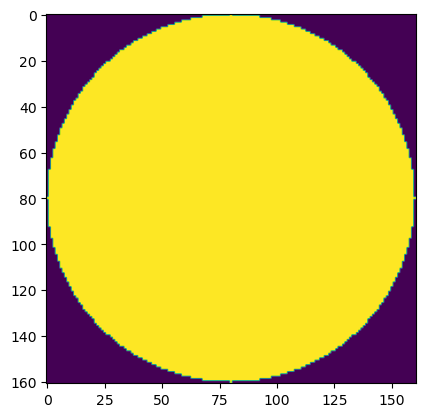

In [3]:
K = 80           # Limit of k-space we are looking at

# Create array of k-vector magnitudes
Kvec = np.arange(-K,K+1).reshape((1,-1))
Kmag = np.sqrt(Kvec**2 + (Kvec**2).T)

# Create the mask of k-vectors to be constrained
Kmask = np.array(Kmag <= K,dtype=np.int32)

fig = plt.figure()
ax = fig.gca()
ax.imshow(Kmask)
plt.show()

In [4]:
# Create the array of structure factor values corresponding to the k-vectors to be constrained
Sk = np.zeros(Kmag.shape)

# Create the weighting function
wk = Kmask

# Don't constrain the trivial peak at S(k=0)
center = int(Kmask.shape[0]/2)
wk[center,center] = 0

In [5]:
loss = NUwU(c, K, Sk, wk, L) # Initialize loss function
minimizer = LBFGS_CPP(x0, loss, iprint=100) # Initialize minimizer

In [6]:
# Run the minimization
minimizer.run(1000)
res = minimizer.get_result()
x = np.array(res.coords)

lbgs: 0 E 1.78484210110002168e+04 rms 1.90061864672943614e+02 nfev 2 step norm 9.99999999999999639e-02
lbgs: 100 E 6.27372997311286817e-02 rms 5.08135805804189097e-03 nfev 108 step norm 1.65129627073227472e-03
lbgs: 200 E 1.15543968037261900e-03 rms 2.20724118479722232e-04 nfev 208 step norm 1.04971854474694964e-03
lbgs: 300 E 1.28940329704815176e-04 rms 5.64366160427884299e-05 nfev 308 step norm 2.07599648138048418e-03


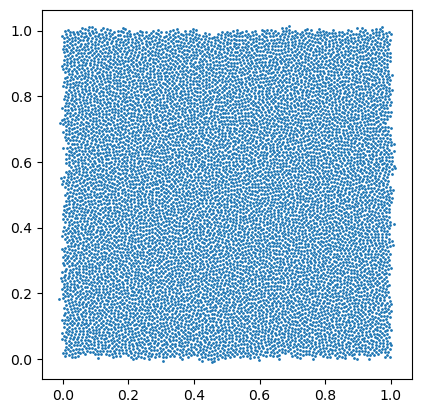

In [7]:
points = x.reshape(-1,ndim)

fig = plt.figure()
ax = fig.gca()
ax.scatter(points[:,0], points[:,1], s=1)
ax.set_aspect('equal')
plt.show()

findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeThreeSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFourSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFiveSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmsy10'] not

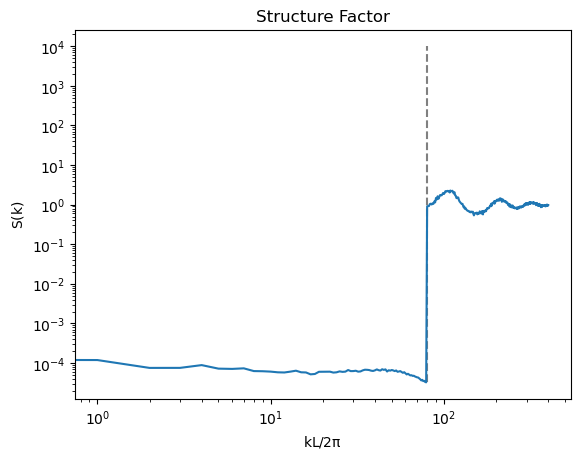

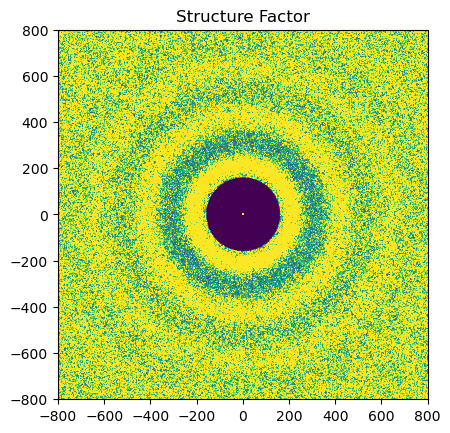

In [8]:
Kspan = K*10 # extent to which we are calculating S(k)

q,S,Sk,r,g, gr = export_structure(points,L, Nk = Kspan)

fig = plt.figure()
ax = fig.gca()
ax.plot([K,K],[np.amin(S),np.amax(S)],linestyle='dashed',c='grey')
ax.plot(q, S)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("Structure Factor")
ax.set_xlabel(r"$kL/2\pi$")
ax.set_ylabel(r"$S(k)$")
plt.show()

fig = plt.figure()
ax = fig.gca()
ax.imshow(Sk,vmin=0,vmax=1,extent=[-Kspan, Kspan, -Kspan, Kspan])
ax.set_title("Structure Factor")
plt.show()